In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('Wine_new.csv')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


### There are a few variables that R tests indicated are not significant in predicting the output value. These variables are: 
* fixed acidity
* residual sugar
* density 
* pH

### I will be creating another logistic model using only these variables:
* volatile acidity
* citric acid
* chlorides 
* free sulfur dioxide 
* total sulfur dioxide
* sulphates
* alcohol

### My hypothesis is that the classification report will show this model is more accurate since we are only using statistically significant predictor values
### I also predict that there will be more true negative and true positive values shown in the confusion matrix

# Splitting the Data
### Using only specific variables as predictors (X values)

In [4]:
x=df[['volatile acidity','citric acid',
      'chlorides','free sulfur dioxide','total sulfur dioxide',
      'sulphates','alcohol']]
y=df[['quality']]

In [6]:
from sklearn.model_selection import train_test_split
# splitting into 70% training, 30% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 7)
(480, 7)
(1119, 1)
(480, 1)


# Creating Model

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(x_train.values,y_train)

/Users/jamesonbuie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [10]:
y_pred=classifier.predict(x_test.values)

In [11]:
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [12]:
y_test.head(10)

,quality
1109,1
1032,0
1002,1
487,1
979,0
1054,1
542,0
853,1
1189,0
412,0


# Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[166  60]
 [ 57 197]]


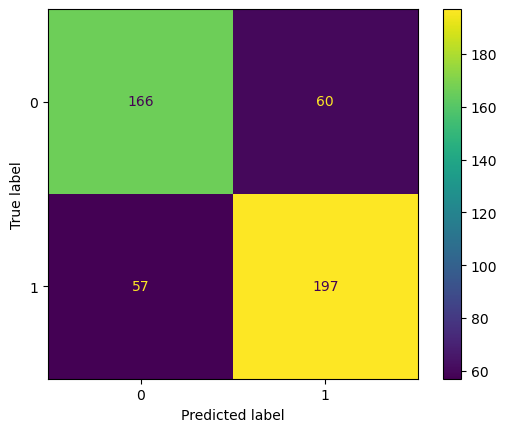

In [15]:
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
display.plot()
plt.show()

# Classification Report

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       226
           1       0.77      0.78      0.77       254

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



## This model using only statstically significant variables as predictors is 1% more accurate than the model using all independent variables as predictors